## Concat csvs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Concat coefs

In [46]:
coef_fano = pd.read_csv('csvs/coef_fano.csv')
coef_huff = pd.read_csv('csvs/coef_huff.csv')
coef_lz775 = pd.read_csv('csvs/coef_lz775.csv')
coef_lz7710 = pd.read_csv('csvs/coef_lz7710.csv')
coef_lz7720 = pd.read_csv('csvs/coef_lz7720.csv')
coef_fano.shape

(36, 3)

In [47]:
coefs = pd.concat([coef_huff, coef_fano, coef_lz775, coef_lz7710,  coef_lz7720])
coefs.shape

(180, 3)

In [123]:
compress_fano = pd.read_csv('csvs/compress_fano.csv')
compress_huff = pd.read_csv('csvs/compress_huff.csv')
compress_lz775 = pd.read_csv('csvs/compress_lz775.csv')
compress_lz7710 = pd.read_csv('csvs/compress_lz7710.csv')
compress_lz7720 = pd.read_csv('csvs/compress_lz7720.csv')

In [124]:
compress_huff.head()

,type,name,comp,decomp
0,huff,1,4.873086e+09,4.978361e+10
1,huff,2,3.090384e+09,6.489439e+09
2,huff,3,1.435233e+08,1.183408e+09
3,huff,4,2.744343e+08,2.745888e+09
4,huff,5,9.923047e+07,1.963436e+08


In [125]:
compress_huff['comp'] = compress_huff['comp'] / 4;
compress_huff['decomp'] = compress_huff['decomp'] / 2.6;

In [126]:
compress_huff.head()

,type,name,comp,decomp
0,huff,1,1.218271e+09,1.914754e+10
1,huff,2,7.725959e+08,2.495938e+09
2,huff,3,3.588083e+07,4.551567e+08
3,huff,4,6.860857e+07,1.056111e+09
4,huff,5,2.480762e+07,7.551676e+07


In [127]:
compress = pd.concat([compress_huff, compress_fano, compress_lz775, compress_lz7710, compress_lz7720])

In [128]:
compress.to_csv('compress_full_fixed.csv')

In [93]:
compress.shape

(180, 4)

In [94]:
compress.head()

,type,name,comp,decomp
0,huff,1,1.218271e+09,2.620190e+10
1,huff,2,7.725959e+08,3.415494e+09
2,huff,3,3.588083e+07,6.228461e+08
3,huff,4,6.860857e+07,1.445204e+09
4,huff,5,2.480762e+07,1.033387e+08


In [65]:
grp = coefs.groupby('type')
grp['name']

In [28]:
huff = grp.get_group('huff')
# # sns.countplot(x=huff['name'], y=huff['k'])
# plt.figure(figsize=(10,7))
# plt.title('Huffman (отношение сжатого к исходному)')
# sns.barplot(x=grp['name'], y=grp['k'])
# plt.ylabel('Коэфициент сжатия')
# plt.xlabel('Номер файла')
# plt.savefig('graphs/huffman_coef', dpi=200)
# plt.show()


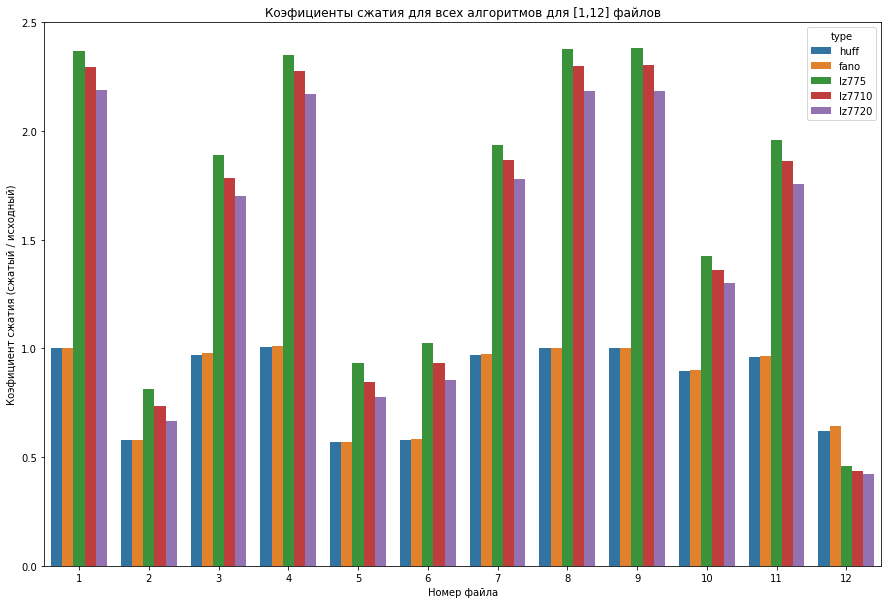

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x='name', y='k', hue='type', data=coefs[coefs['name'] <= 12])
plt.xlabel('Номер файла')
plt.ylabel('Коэфициент сжатия (сжатый / исходный)')
plt.title('Коэфициенты сжатия для всех алгоритмов для [1,12] файлов')
plt.savefig('graphs/f0-12_coef', dpi=200)
plt.show()

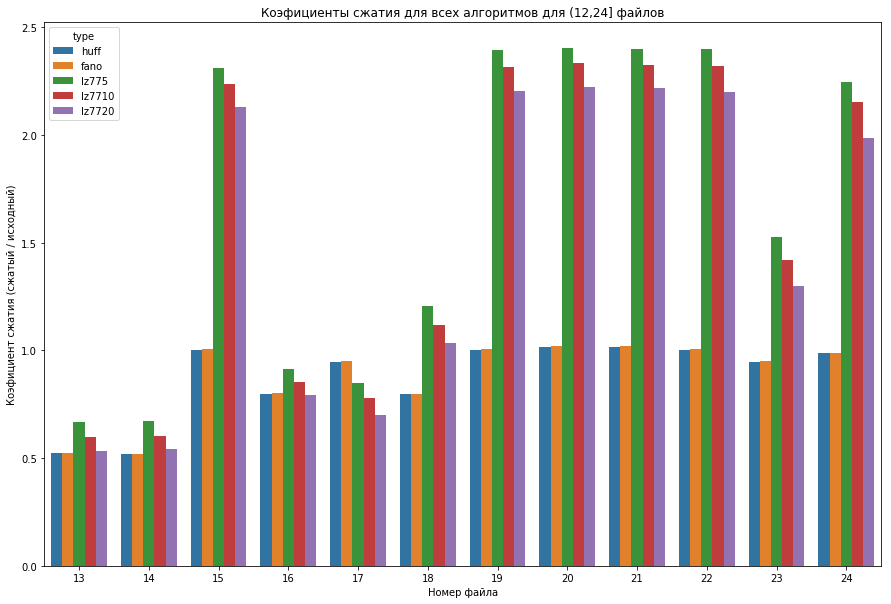

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x='name', y='k', hue='type', data=coefs[(coefs['name'] <= 24) & (coefs['name'] > 12)])
plt.xlabel('Номер файла')
plt.ylabel('Коэфициент сжатия (сжатый / исходный)')
plt.title('Коэфициенты сжатия для всех алгоритмов для (12,24] файлов')
plt.savefig('graphs/f12-24_coef', dpi=200)
plt.show()

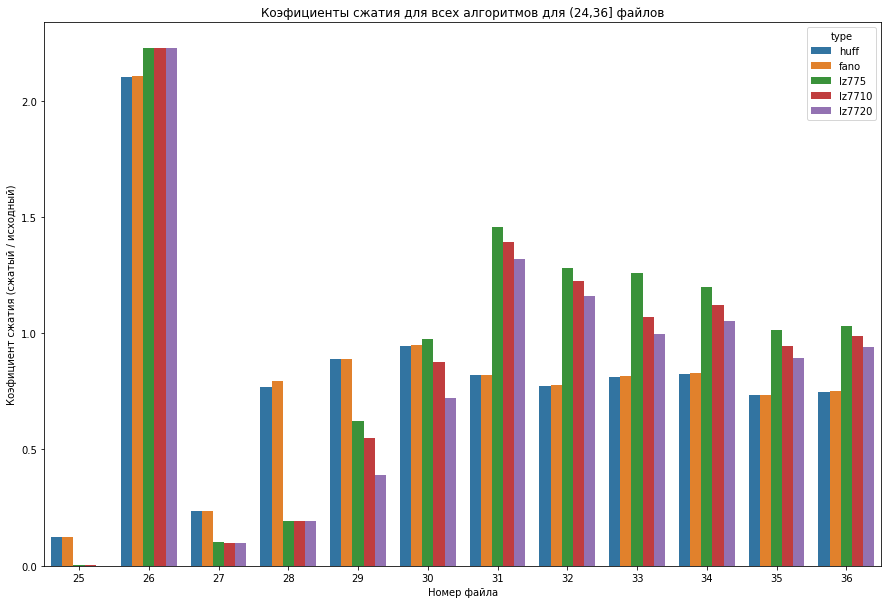

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(x='name', y='k', hue='type', data=coefs[(coefs['name'] <= 36) & (coefs['name'] > 24)])
plt.xlabel('Номер файла')
plt.ylabel('Коэфициент сжатия (сжатый / исходный)')
plt.title('Коэфициенты сжатия для всех алгоритмов для (24,36] файлов')
plt.savefig('graphs/f24-36_coef', dpi=200)
plt.show()

In [30]:
compress.head()

,type,name,comp,decomp
0,huff,1,3.248724e+09,2.489181e+10
1,huff,2,2.060256e+09,3.244720e+09
2,huff,3,9.568222e+07,5.917038e+08
3,huff,4,1.829562e+08,1.372944e+09
4,huff,5,6.615365e+07,9.817179e+07


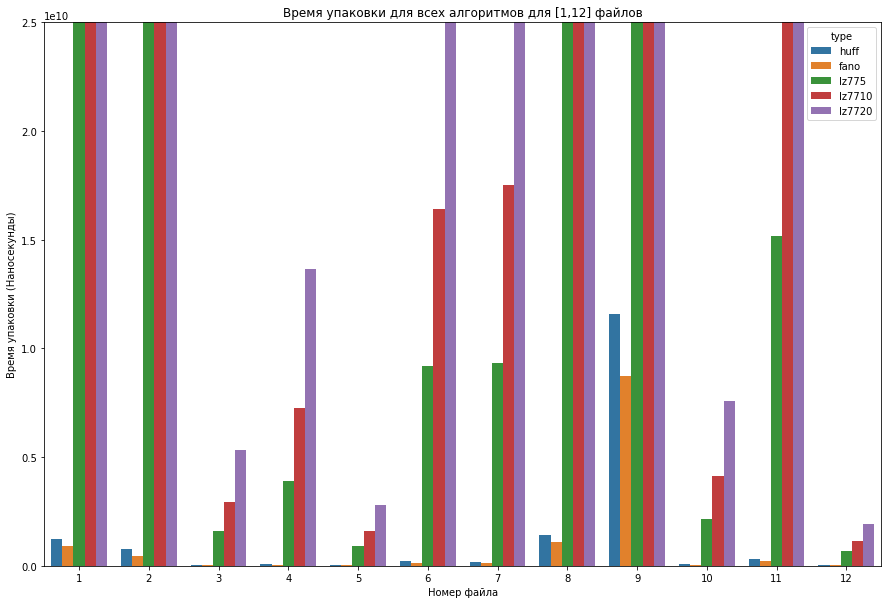

In [134]:
plt.figure(figsize=(15,10))
sns.barplot(x='name', y='comp', hue='type', data=compress[compress['name'] <= 12])
plt.xlabel('Номер файла')
plt.ylabel('Время упаковки (Наносекунды)')
plt.title('Время упаковки для всех алгоритмов для [1,12] файлов')
plt.ylim(-1, 2.5e10)
plt.savefig('graphs/f0-12_compress_crop', dpi=200)
plt.show()

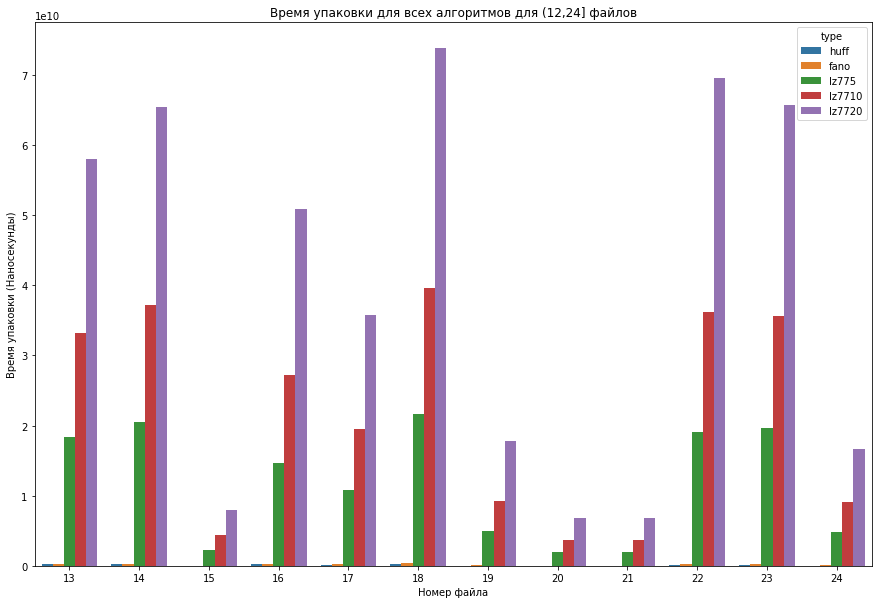

In [68]:
plt.figure(figsize=(15,10))
sns.barplot(x='name', y='comp', hue='type', data=compress[(compress['name'] <= 24) & (compress['name'] > 12)])
plt.xlabel('Номер файла')
plt.ylabel('Время упаковки (Наносекунды)')
plt.title('Время упаковки для всех алгоритмов для (12,24] файлов')
# plt.ylim(-1, 0.6e10)
plt.savefig('graphs/f12-24_compress_full', dpi=200)
plt.show()

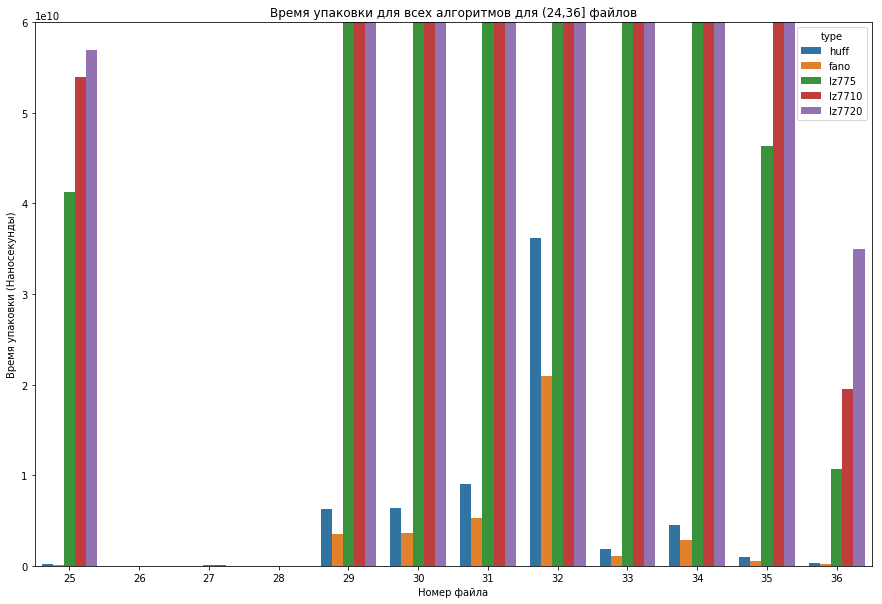

In [135]:
plt.figure(figsize=(15,10))
sns.barplot(x='name', y='comp', hue='type', data=compress[(compress['name'] <= 36) & (compress['name'] > 24)])
plt.xlabel('Номер файла')
plt.ylabel('Время упаковки (Наносекунды)')
plt.title('Время упаковки для всех алгоритмов для (24,36] файлов')
plt.ylim(-1, 0.6e11)
plt.savefig('graphs/f24-36_compress_crop', dpi=200)
plt.show()

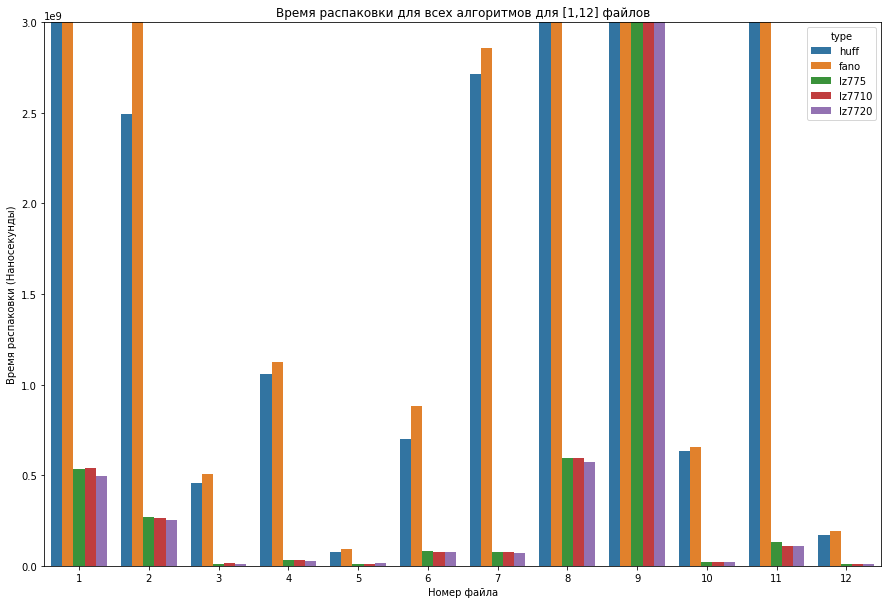

In [141]:
plt.figure(figsize=(15,10))
sns.barplot(x='name', y='decomp', hue='type', data=compress[compress['name'] <= 12])
plt.xlabel('Номер файла')
plt.ylabel('Время распаковки (Наносекунды)')
plt.title('Время распаковки для всех алгоритмов для [1,12] файлов')
plt.ylim(-1, 0.3e10)
plt.savefig('graphs/f0-12_decompress_crop', dpi=200)
plt.show()

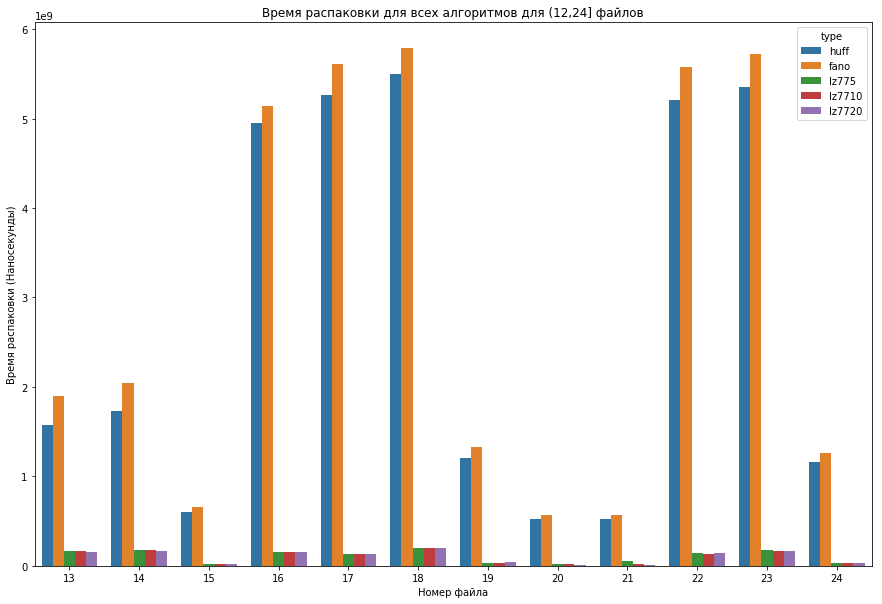

In [131]:
plt.figure(figsize=(15,10))
sns.barplot(x='name', y='decomp', hue='type', data=compress[(compress['name'] <= 24) & (compress['name'] > 12)])
plt.xlabel('Номер файла')
plt.ylabel('Время распаковки (Наносекунды)')
plt.title('Время распаковки для всех алгоритмов для (12,24] файлов')
# plt.ylim(-1, 0.6e10)
plt.savefig('graphs/f12-24_decompress_full', dpi=200)
plt.show()

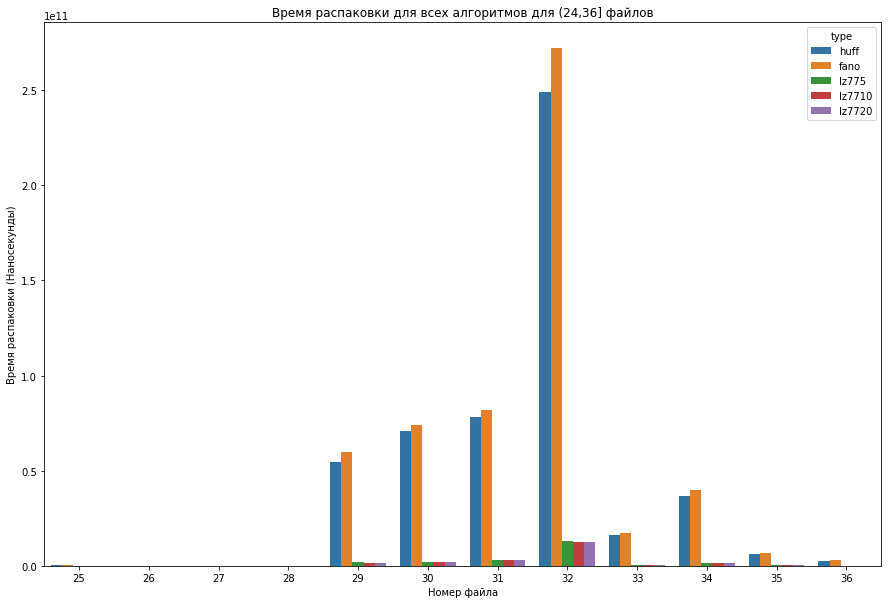

In [132]:
plt.figure(figsize=(15,10))
sns.barplot(x='name', y='decomp', hue='type', data=compress[(compress['name'] <= 36) & (compress['name'] > 24)])
plt.xlabel('Номер файла')
plt.ylabel('Время распаковки (Наносекунды)')
plt.title('Время распаковки для всех алгоритмов для (24,36] файлов')
# plt.ylim(-1, 0.8e11)
plt.savefig('graphs/f24-36_decompress_full', dpi=200)
plt.show()

In [42]:
compress.to_csv('csvs/compress_full.csv', sep=',')
coefs.to_csv('csvs/coefs_full.csv', sep=',')

In [43]:
entropy = pd.read_csv('csvs/entropy.csv')

In [44]:
compress.head()

,type,name,comp,decomp
0,huff,1,4.873086e+09,4.978361e+10
1,huff,2,3.090384e+09,6.489439e+09
2,huff,3,1.435233e+08,1.183408e+09
3,huff,4,2.744343e+08,2.745888e+09
4,huff,5,9.923047e+07,1.963436e+08


In [45]:
coefs.head()

,type,name,k
0,huff,1,1.000467
1,huff,2,0.579361
2,huff,3,0.971544
3,huff,4,1.007811
4,huff,5,0.569410


In [46]:
entropy.head()

,name,entropy
0,1,0.999290
1,2,0.713482
2,3,0.950573
3,4,0.997555
4,5,0.694124


In [83]:
result = entropy

In [108]:
name = 'lz7720'

In [109]:
grp_coefs = coefs.groupby('type').get_group(name)

In [110]:
result = pd.concat([result, grp_coefs['k']], axis=1)

In [111]:
grp = compress.groupby('type').get_group(name)

In [112]:
result = pd.concat([result, grp[['comp', 'decomp']]], axis=1)

In [113]:
result

,name,entropy,k,comp,decomp,k,comp,decomp,k,comp,decomp,k,comp,decomp,k,comp,decomp
0,1,0.999290,1.000467,4.873086e+09,4.978361e+10,1.002296,9.116982e+08,1.994585e+10,2.369449,6.804760e+10,5.361342e+08,2.295928,1.300272e+11,5.410352e+08,2.189236,2.420307e+11,4.981117e+08
1,2,0.713482,0.579361,3.090384e+09,6.489439e+09,0.579416,4.648962e+08,3.001775e+09,0.814163,2.619900e+10,2.717149e+08,0.734759,4.644981e+10,2.628796e+08,0.668077,8.358705e+10,2.545454e+08
2,3,0.950573,0.971544,1.435233e+08,1.183408e+09,0.977214,2.678594e+07,5.057892e+08,1.890896,1.608561e+09,1.254162e+07,1.784661,2.940317e+09,1.283755e+07,1.698636,5.325501e+09,1.256419e+07
3,4,0.997555,1.007811,2.744343e+08,2.745888e+09,1.009871,5.402934e+07,1.124779e+09,2.350116,3.892674e+09,3.068194e+07,2.275568,7.274675e+09,3.011190e+07,2.168379,1.364675e+10,2.639364e+07
4,5,0.694124,0.569410,9.923047e+07,1.963436e+08,0.570407,1.534595e+07,9.157953e+07,0.932782,8.986262e+08,8.701010e+06,0.845736,1.613251e+09,8.451577e+06,0.774141,2.796946e+09,1.638326e+07
5,6,0.675544,0.580053,8.872645e+08,1.817129e+09,0.581859,1.405284e+08,8.821626e+08,1.023009,9.172424e+09,8.052519e+07,0.933008,1.640529e+10,7.804139e+07,0.855671,2.946288e+10,7.567308e+07
6,7,0.963603,0.971410,7.762785e+08,7.062881e+09,0.973547,1.389140e+08,2.858116e+09,1.936404,9.312255e+09,7.871909e+07,1.866425,1.749950e+10,7.420915e+07,1.779341,3.252933e+10,6.934710e+07
7,8,0.999694,1.000431,5.676598e+09,5.824196e+10,1.002076,1.073352e+09,2.319007e+10,2.377278,7.977251e+10,5.972719e+08,2.298278,1.522603e+11,5.949792e+08,2.182424,2.821809e+11,5.707227e+08
8,9,0.999302,1.000053,4.628080e+10,4.620857e+11,1.002828,8.744282e+09,1.876494e+11,2.380921,6.398011e+11,4.905229e+09,2.303934,1.235328e+12,5.056986e+09,2.183503,2.281210e+12,4.873027e+09
9,10,0.883510,0.897395,2.451746e+08,1.645979e+09,0.899857,4.508246e+07,6.582557e+08,1.424836,2.139675e+09,1.964210e+07,1.360837,4.135034e+09,1.943359e+07,1.299689,7.566313e+09,1.861381e+07


In [114]:
result.to_csv('csvs/table.csv', sep=',')

In [115]:
result.columns = ['Имя файла', 'H', 'K', 'tp', 'tu', 'K', 'tp', 'tu', 'K', 'tp', 'tu', 'K', 'tp', 'tu', 'K', 'tp', 'tu']

In [123]:
result = np.round(result, decimals=3)

In [124]:
result

,Имя файла,H,K,tp,tu,K,tp,tu,K,tp,tu,K,tp,tu,K,tp,tu
0,1,0.999,1.000,4.873086e+09,4.978361e+10,1.002,9.116982e+08,1.994585e+10,2.369,6.804760e+10,5.361342e+08,2.296,1.300272e+11,5.410352e+08,2.189,2.420307e+11,4.981117e+08
1,2,0.713,0.579,3.090384e+09,6.489439e+09,0.579,4.648962e+08,3.001775e+09,0.814,2.619900e+10,2.717149e+08,0.735,4.644981e+10,2.628796e+08,0.668,8.358705e+10,2.545454e+08
2,3,0.951,0.972,1.435233e+08,1.183408e+09,0.977,2.678594e+07,5.057892e+08,1.891,1.608561e+09,1.254162e+07,1.785,2.940317e+09,1.283755e+07,1.699,5.325501e+09,1.256419e+07
3,4,0.998,1.008,2.744343e+08,2.745888e+09,1.010,5.402934e+07,1.124779e+09,2.350,3.892674e+09,3.068194e+07,2.276,7.274675e+09,3.011190e+07,2.168,1.364675e+10,2.639364e+07
4,5,0.694,0.569,9.923047e+07,1.963436e+08,0.570,1.534595e+07,9.157953e+07,0.933,8.986262e+08,8.701010e+06,0.846,1.613251e+09,8.451577e+06,0.774,2.796946e+09,1.638326e+07
5,6,0.676,0.580,8.872645e+08,1.817129e+09,0.582,1.405284e+08,8.821626e+08,1.023,9.172424e+09,8.052519e+07,0.933,1.640529e+10,7.804139e+07,0.856,2.946288e+10,7.567308e+07
6,7,0.964,0.971,7.762785e+08,7.062881e+09,0.974,1.389140e+08,2.858116e+09,1.936,9.312255e+09,7.871909e+07,1.866,1.749950e+10,7.420915e+07,1.779,3.252933e+10,6.934710e+07
7,8,1.000,1.000,5.676598e+09,5.824196e+10,1.002,1.073352e+09,2.319007e+10,2.377,7.977251e+10,5.972719e+08,2.298,1.522603e+11,5.949792e+08,2.182,2.821809e+11,5.707227e+08
8,9,0.999,1.000,4.628080e+10,4.620857e+11,1.003,8.744282e+09,1.876494e+11,2.381,6.398011e+11,4.905229e+09,2.304,1.235328e+12,5.056986e+09,2.184,2.281210e+12,4.873027e+09
9,10,0.884,0.897,2.451746e+08,1.645979e+09,0.900,4.508246e+07,6.582557e+08,1.425,2.139675e+09,1.964210e+07,1.361,4.135034e+09,1.943359e+07,1.300,7.566313e+09,1.861381e+07


In [125]:
result.to_csv('csvs/table.csv', sep=',')